# Conflicts of the Yemen country released by ACLED

Link to Conflicts data released by ACLED: https://www.acleddata.com/data/

For more details about the data: https://www.acleddata.com/resources/general-guides/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import geopandas as gpd
import pandas as pd
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("wfp_conflicts_yemen.csv")
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6721283,887,YEM46513,46513,18 January 2020,2020,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2016-) Supreme Polit...,...,Zabid,14.1951,43.3152,2,Aden al Ghad,National,"On 18 January, it was reported that pro-Houthi...",0,1579539786,YEM
1,6721289,887,YEM46487,46487,18 January 2020,2020,1,Protests,Peaceful protest,Protesters (Yemen),...,Wadi Dofas,13.0533,45.3233,2,Aden al Ghad,Subnational,"On 18 January, soldiers from the Security Belt...",0,1579539786,YEM
2,6721294,887,YEM46509,46509,18 January 2020,2020,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2016-) Supreme Polit...,...,At Tuhayta,14.1836,43.2264,2,Aden al Ghad,National,"On 18 January, it was reported that pro-Houthi...",0,1579539786,YEM
3,6721296,887,YEM46489,46489,18 January 2020,2020,1,Protests,Peaceful protest,Protesters (Yemen),...,Ash Shaykh Salim,13.1822,45.4770,1,Aden al Ghad,Subnational,"On 18 January, soldiers from the Security Belt...",0,1579539786,YEM
4,6721300,887,YEM46493,46493,18 January 2020,2020,1,Strategic developments,Change to group/activity,Operation Restoring Hope,...,Al Burayqah,12.7394,44.8842,2,Al Masdar,National,"On 17 January, Saudi military forces consistin...",0,1579539786,YEM


### Brief keys description

- *iso*: a numeric code	for	each individual	country.
- *event_id_cnty*: an individual identifier	by number and country acronym (updated annually).
- *event_id_no_cnty*: an individual	numeric	identifier (updated	annually).
- *event_date*: the	day, month and year	on which an	event took place.
- *year*: the year in which	an event took place.
- *time_precision*: a numeric code indicating the level	of certainty of	the	date coded for the event.
- *event_type*: the	type of	event.
- *sub_event_type*: the	type of	sub-event.
- *actor1*: the	named actor	involved in	the	event.
- *assoc_actor_1*: the named actor associated with or identifying actor1.
- *inter1*: a numeric code indicating the type of actor1.
- *actor2*: the	named actor	involved in	the	event.
- *assoc_actor_2*: the named actor associated with or identifying actor2.
- *inter2*: a numeric code indicating the type of actor2.
- *interaction*: a numeric code	indicating the interaction between types of	actor1 and actor2.
- *region*: the	region of the world	where the event	took place.
- *country*: the country in	which the event	took place.
- *admin1*: the	largest	sub-national administrative	region in which	the	event took place.
- *admin2*: the	second largest sub-national	administrative region in which the event took place.
- *admin3*: the	third largest sub-national administrative region in	which the event	too place.
- *location*: the location in which	the	event took place.
- *latitude*: the latitude of the location.
- *longitude*: the longitude of	the	location.
- *geo_precision*: a numeric code indicating the level of certainty	of the location coded for the event.
- *source*: the	source of the event	report.
- *source scale*: the scale	(local,	regional, national,	international) of the source.
- *notes*: a short description of the event.
- *fatalities*: the	number of reported fatalities which	occurred during	the	event.

ACLED currently	codes six types	of events, both	violent	and	non-violent, that may occur during a conflict. These include:
- *Battles*: (Violent interactions between two organised armed groups);
- *Explosions/Remote violence* (One-sided violence events in which the tool for	engaging in	conflict creates asymmetry by taking away the ability of the target	to respond);
- *Violence against civilians* (Violent	events where an	organised armed	group deliberately inflicts	violence upon unarmed non-combatants);
- *Protests* (A	public demonstration against a political entity, government	institution, policy	or group in	which the participants are not violent);
- *Riots* (Violent events where	demonstrators or mobs engage in	disruptive acts	or disorganised	acts of	violence against property or people);
- *Strategic development* (accounts	for often non-violent activity by conflict and other agents	within the context of the war/dispute. Recruitment,	looting	and	arrests	are	included).

In [3]:
# Keep only some features/items and raname them.
df = df[["event_date", "event_type", "sub_event_type", "admin1", "location", "latitude", "longitude", "fatalities"]]
df.rename(columns = {"event_date": "Datetime", "event_type": "Event type", "sub_event_type": "Subevent type", "admin1": "AdminStrata", "fatalities": "Fatalities", "latitude": "Latitude", "longitude": "Longitude", "location": "Location"}, inplace = True)
# Convert temporal information in datetime pandas format.
df["Datetime"] = pd.to_datetime(df.Datetime, infer_datetime_format = True)
df.head()

,Datetime,Event type,Subevent type,AdminStrata,Location,Latitude,Longitude,Fatalities
0,2020-01-18,Strategic developments,Change to group/activity,Al Hudaydah,Zabid,14.1951,43.3152,0
1,2020-01-18,Protests,Peaceful protest,Abyan,Wadi Dofas,13.0533,45.3233,0
2,2020-01-18,Strategic developments,Change to group/activity,Al Hudaydah,At Tuhayta,14.1836,43.2264,0
3,2020-01-18,Protests,Peaceful protest,Abyan,Ash Shaykh Salim,13.1822,45.4770,0
4,2020-01-18,Strategic developments,Change to group/activity,Aden,Al Burayqah,12.7394,44.8842,0


In [4]:
# Rename the name of some AdminStrata according to the fcs and rcsi names of the AdminStrata.
df.replace(["Lahij", "Sanaa'", "Amanat Al Asimah", "Sadah", "Hadramawt", "Al Mahrah", "Suqutra"], ["Lahj", "Sana'a", "Sana'a City", "Sa'dah", "Hadramaut", "Al Maharah", "Socotra"], inplace = True)

### Shapefile

In [5]:
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,Datetime,Event type,Subevent type,AdminStrata,Location,Latitude,Longitude,Fatalities,geometry
0,2020-01-18,Strategic developments,Change to group/activity,Al Hudaydah,Zabid,14.1951,43.3152,0,POINT (43.31520 14.19510)
1,2020-01-18,Protests,Peaceful protest,Abyan,Wadi Dofas,13.0533,45.3233,0,POINT (45.32330 13.05330)
2,2020-01-18,Strategic developments,Change to group/activity,Al Hudaydah,At Tuhayta,14.1836,43.2264,0,POINT (43.22640 14.18360)
3,2020-01-18,Protests,Peaceful protest,Abyan,Ash Shaykh Salim,13.1822,45.4770,0,POINT (45.47700 13.18220)
4,2020-01-18,Strategic developments,Change to group/activity,Aden,Al Burayqah,12.7394,44.8842,0,POINT (44.88420 12.73940)


In [6]:
Month = 8
Year = 2019

In [7]:
gdf_plot = gdf[(gdf.Datetime.dt.month  == Month) & (gdf.Datetime.dt.year  == Year)]
gdf_plot.head()

,Datetime,Event type,Subevent type,AdminStrata,Location,Latitude,Longitude,Fatalities,geometry
3848,2019-08-31,Protests,Peaceful protest,Aden,Aden,12.7794,45.0367,0,POINT (45.03670 12.77940)
3849,2019-08-31,Explosions/Remote violence,Air/drone strike,Hajjah,Harad,16.4097,43.0588,0,POINT (43.05880 16.40970)
3850,2019-08-31,Battles,Armed clash,Al Bayda,Al Qayfa,14.5333,45.0667,10,POINT (45.06670 14.53330)
3851,2019-08-31,Battles,Armed clash,Hajjah,Harad,16.4097,43.0588,10,POINT (43.05880 16.40970)
3852,2019-08-31,Explosions/Remote violence,Remote explosive/landmine/IED,Al Hudaydah,Al Marayibah,14.5743,43.0187,1,POINT (43.01870 14.57430)


In [8]:
# Sum all the values of fatalities occurred in all the month according to the coordinates.
gdf_plot = gdf_plot.groupby(["Latitude", "Longitude"])["Fatalities"].sum().reset_index()
gdf_plot = gpd.GeoDataFrame(gdf_plot, geometry = gpd.points_from_xy(gdf_plot.Longitude, gdf_plot.Latitude))
gdf_plot.head()

,Latitude,Longitude,Fatalities,geometry
0,12.6501,54.0223,0,POINT (54.02230 12.65010)
1,12.7394,44.8842,6,POINT (44.88420 12.73940)
2,12.7481,44.9075,0,POINT (44.90750 12.74810)
3,12.7655,45.0541,12,POINT (45.05410 12.76550)
4,12.7719,44.8619,36,POINT (44.86190 12.77190)


In [9]:
# Load the map of the AdminStrata of the Yemen country.
# Some AdminStrata keys don't fit between the FCS dataframe and the dataframe of shapefiles.
replacing_words = {"Yemen": [{"Ma'rib": "Marib", "Ta'iz": "Taizz", "Al Hodeidah": "Al Hudaydah", "Hadramawt": "Hadramaut", "Ad Dali'": "Ad Dali"}, {"ADM1_EN": "AdminStrata"}]}

shp_path = "./shape_files/Yemen_shapefile/yem_admbnda_adm1_govyem_cso_20191002.shp"
# Open the shapefile.
country = gpd.read_file(shp_path) 

In [10]:
country.rename(columns = replacing_words["Yemen"][1], inplace = True)
if replacing_words["Yemen"][0] != None:
    country.replace(replacing_words["Yemen"][0], inplace = True)

Text(0.5, 1, 'Yemen conflicts: 8-2019')

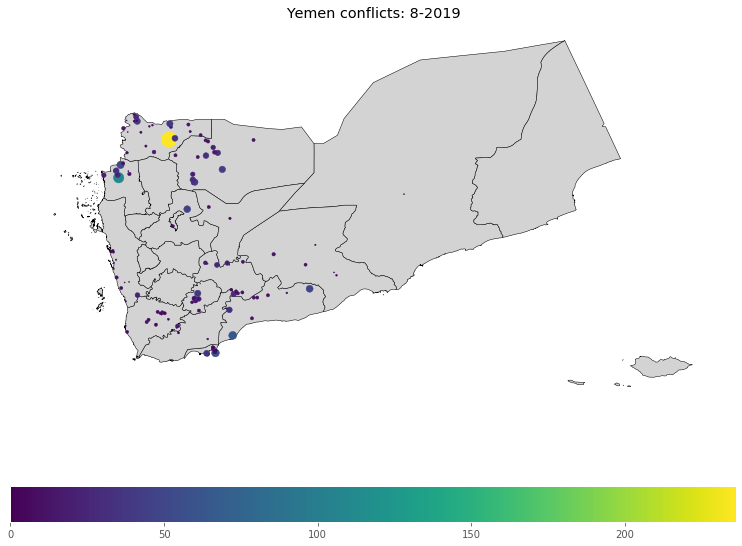

In [11]:
f, ax = plt.subplots(1, figsize = (13, 10))
country.plot(ax = ax, color = "lightgrey", edgecolor = "black")
gdf_plot.plot(column = "Fatalities", ax = ax, markersize = gdf_plot["Fatalities"], legend = True, legend_kwds = {"orientation": "horizontal"})
plt.axis("off")
plt.title("Yemen conflicts: " + str(Month) + "-" + str(Year))

### Preprocessing

In [12]:
def datetime(date):
    y, m, d = str(date.date()).split("-")
    d = str(date.days_in_month)
    date = pd.to_datetime(y + m + d)
    return date

# Convert the item 'Datetime' in the same format of that of FCS and rCSI indicators (end of the month).
df["Datetime"] = df["Datetime"].apply(datetime)
df.sort_values("Datetime", ascending = True, inplace = True) # Sort on datetime.
df.head()

,Datetime,Event type,Subevent type,AdminStrata,Location,Latitude,Longitude,Fatalities,geometry
46398,2015-01-31,Battles,Armed clash,Marib,As Suhayl,15.5469,45.1265,9,POINT (45.12650 15.54690)
46186,2015-01-31,Protests,Peaceful protest,Al Bayda,Al Bayda,13.9852,45.5727,0,POINT (45.57270 13.98520)
46187,2015-01-31,Battles,Armed clash,Al Bayda,Dar An Najd,14.4456,44.8685,10,POINT (44.86850 14.44560)
46188,2015-01-31,Protests,Excessive force against protesters,Al Hudaydah,Al Hudaydah,14.7978,42.9545,0,POINT (42.95450 14.79780)
46189,2015-01-31,Protests,Excessive force against protesters,Amanat al Asimah,Sanaa-At Tahrir,15.3540,44.1979,0,POINT (44.19790 15.35400)


In [13]:
# Sum all the event type (not consider the sub event type) happened in the same month (setting as date reference the end of the month).
df = df.groupby(["AdminStrata", "Event type"]).apply(lambda group: group.set_index("Datetime").resample("M").sum()).reset_index()
df.drop(columns = ["Latitude", "Longitude"], inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

,AdminStrata,Event type,Datetime,Fatalities
0,Abyan,Battles,2015-01-31,11
1,Abyan,Battles,2015-02-28,2
2,Abyan,Battles,2015-03-31,36
3,Abyan,Battles,2015-04-30,154
4,Abyan,Battles,2015-05-31,79


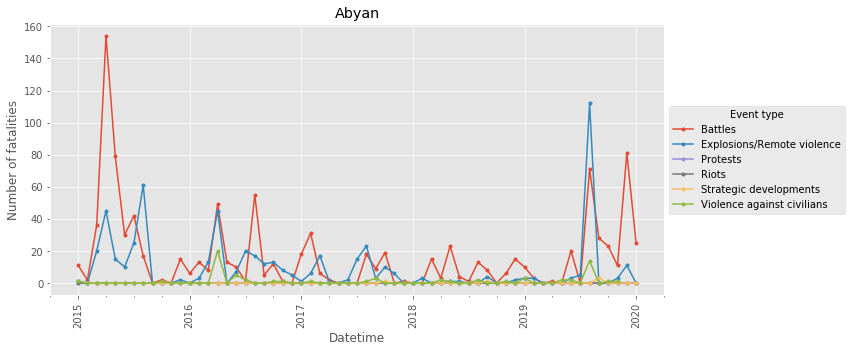

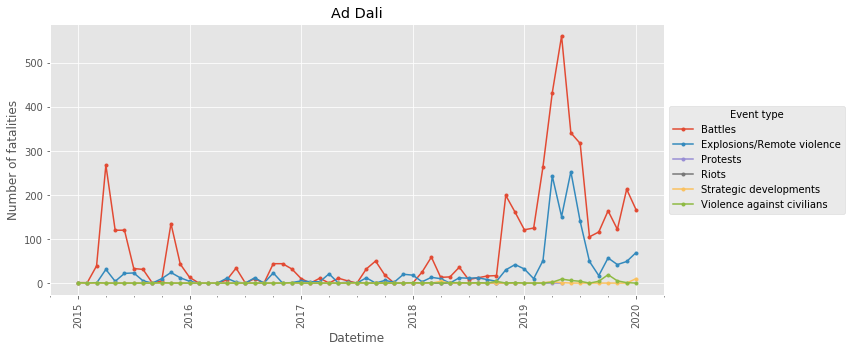

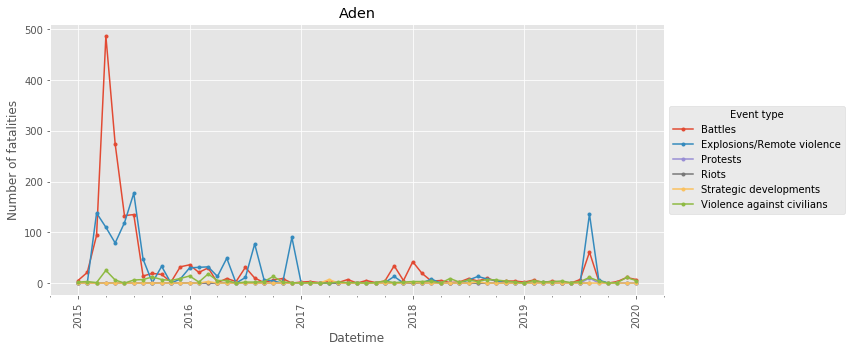

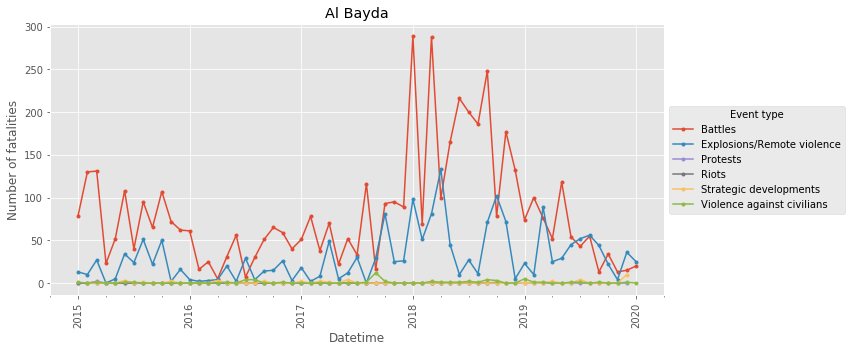

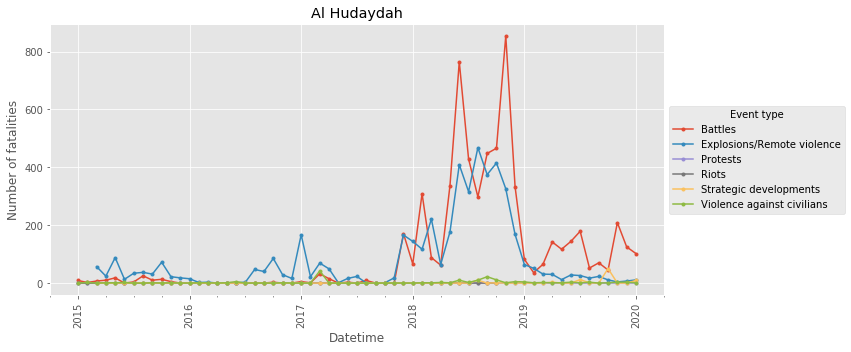

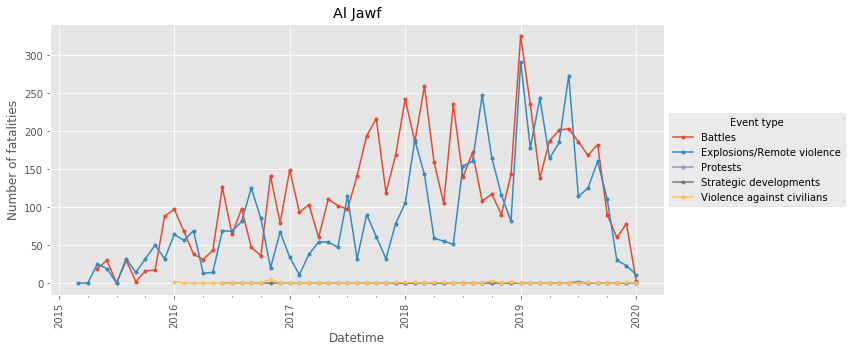

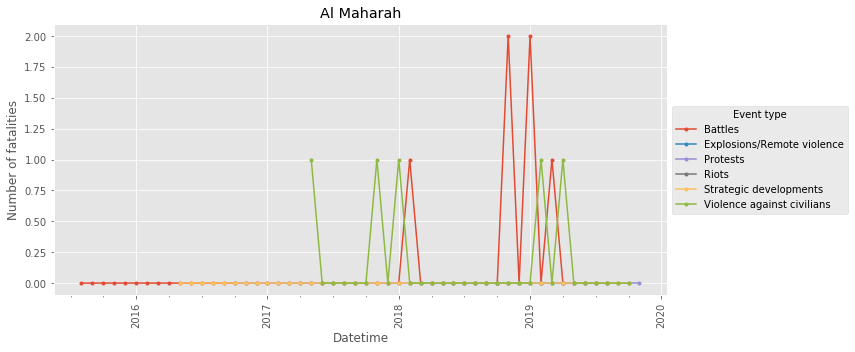

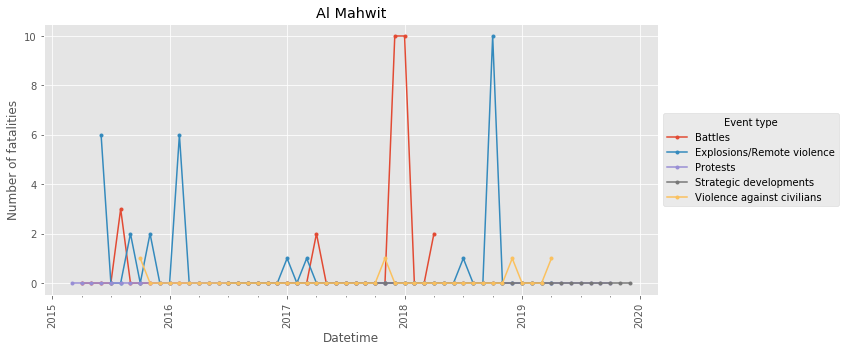

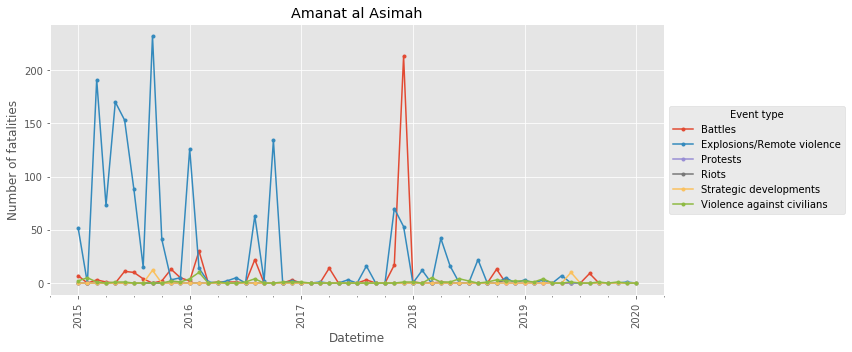

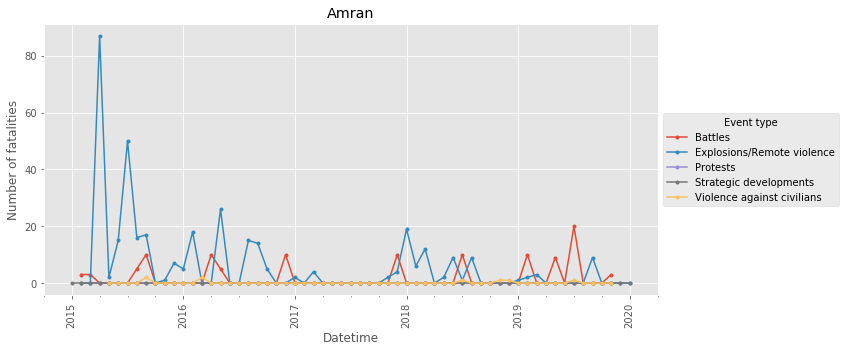

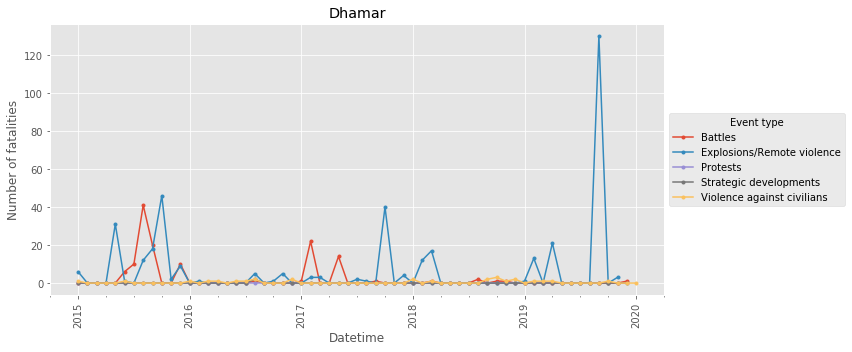

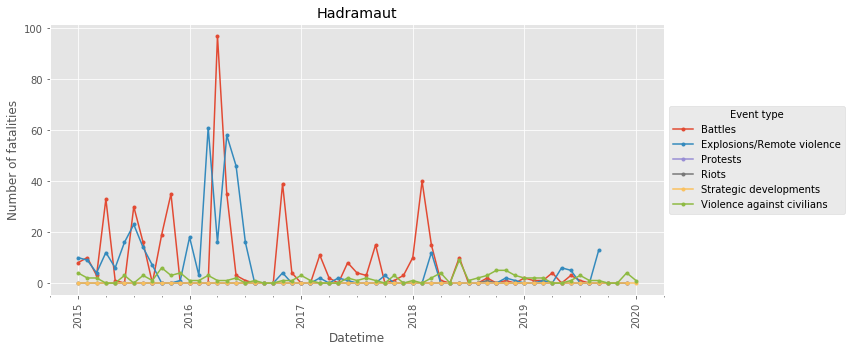

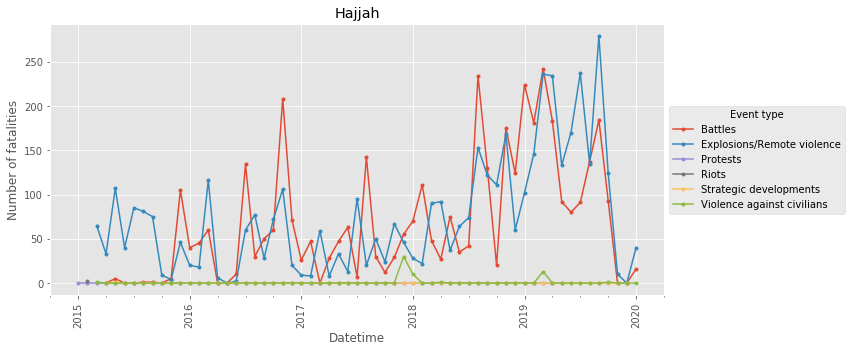

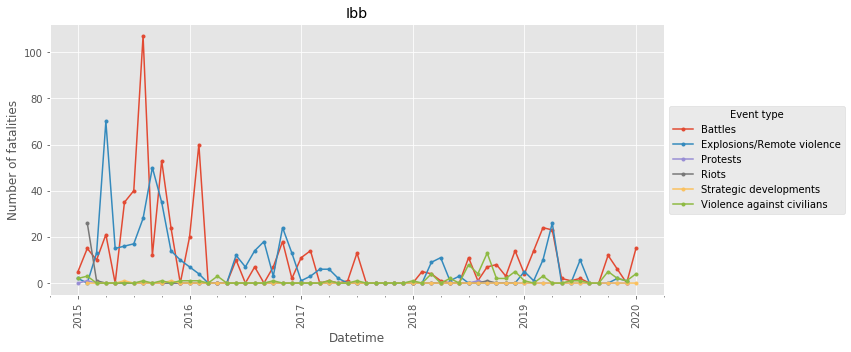

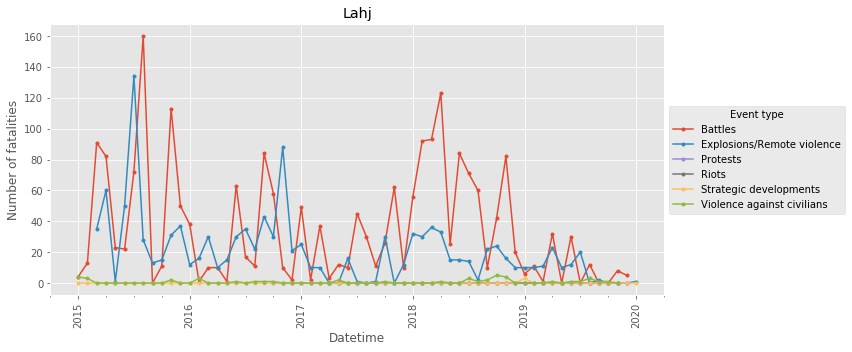

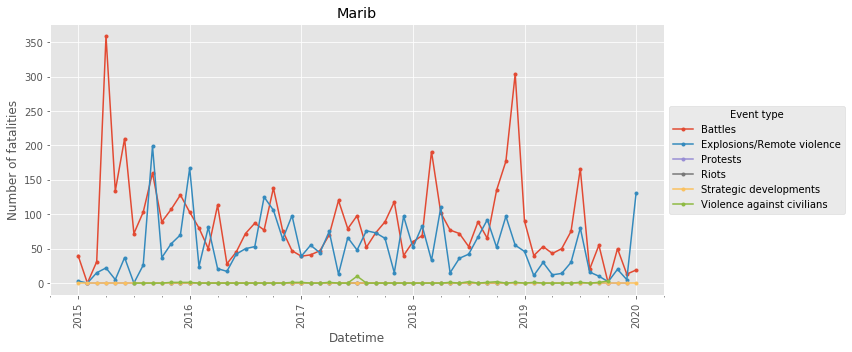

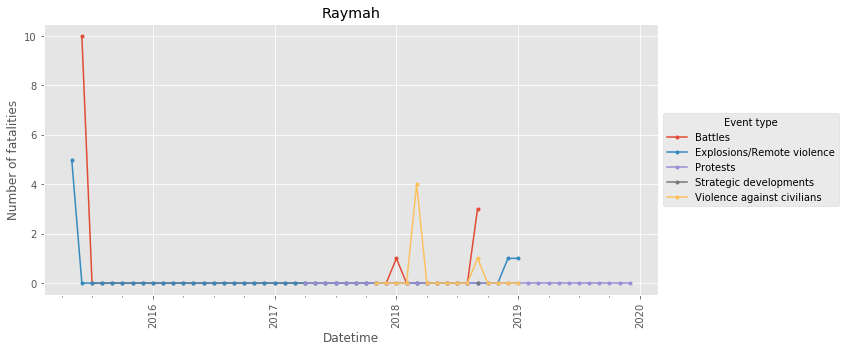

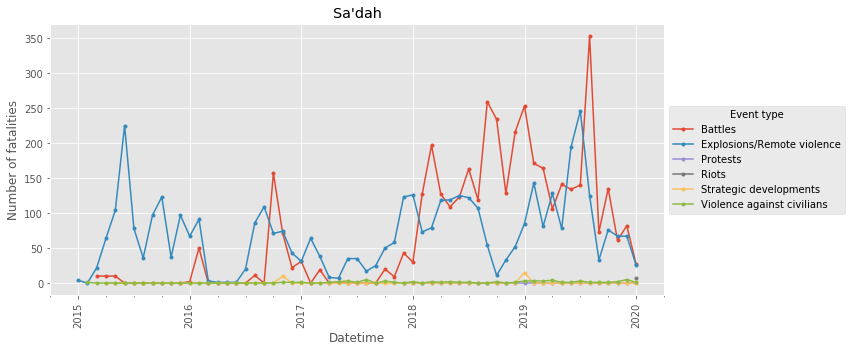

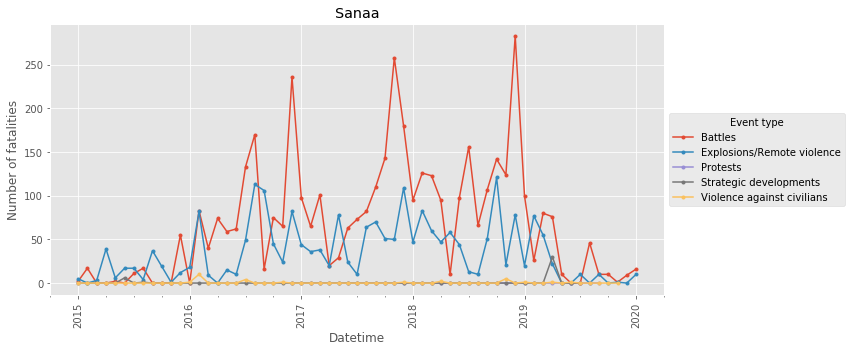

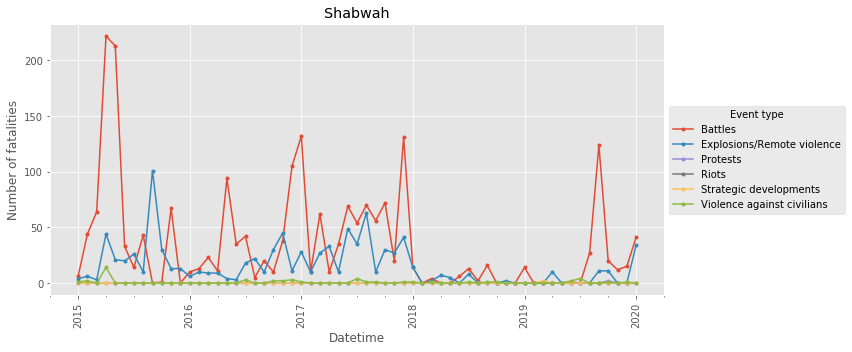

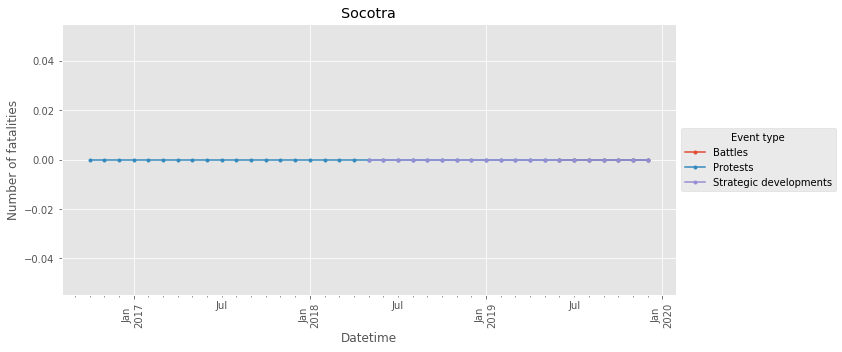

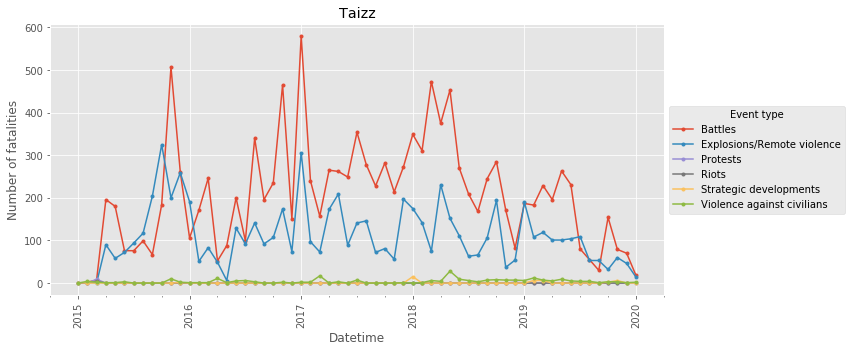

In [14]:
for AdminStrata in df.AdminStrata.unique():
    sub_df = df[df.AdminStrata == AdminStrata]
    f = plt.figure(figsize = (11, 5))
    plt.title(AdminStrata, color = "black")
    sub_df.groupby(["Datetime", "Event type"]).sum()["Fatalities"].unstack().plot(ax = f.gca(), style = ".-")
    plt.legend(title = "Event type", loc = "center left", bbox_to_anchor = (1.0, 0.5))
    plt.ylabel("Number of fatalities")
    plt.xticks(rotation = 90)
    plt.autoscale()
    #plt.savefig(country + '.png')
    plt.show()

In [15]:
# Consider sll the event as one summing over the fatalities and so creating an unique time-series for each AdminStrata.
df = df.groupby(["AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("M").sum()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,AdminStrata,Datetime,Fatalities
0,Abyan,2015-01-31,13
1,Abyan,2015-02-28,2
2,Abyan,2015-03-31,56
3,Abyan,2015-04-30,199
4,Abyan,2015-05-31,94


In [16]:
df = df.groupby(["Datetime", "AdminStrata"]).sum()["Fatalities"].unstack()

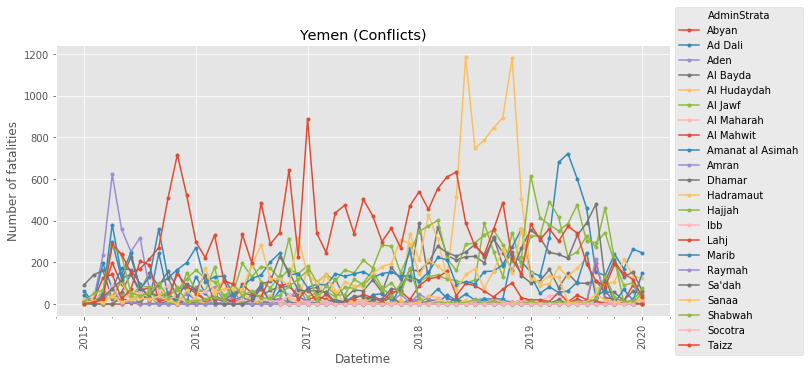

In [17]:
# Show using the white color the points obtained through the interpolation.
f = plt.figure(figsize = (11, 5))
plt.title("Yemen (Conflicts)", color = "black")
df.plot(ax = f.gca(), style = ".-", legend = True)
plt.legend(title = "AdminStrata", loc = "center left", bbox_to_anchor = (1.0, 0.5))
plt.ylabel("Number of fatalities")
plt.xticks(rotation = 90)
plt.autoscale()
plt.show()

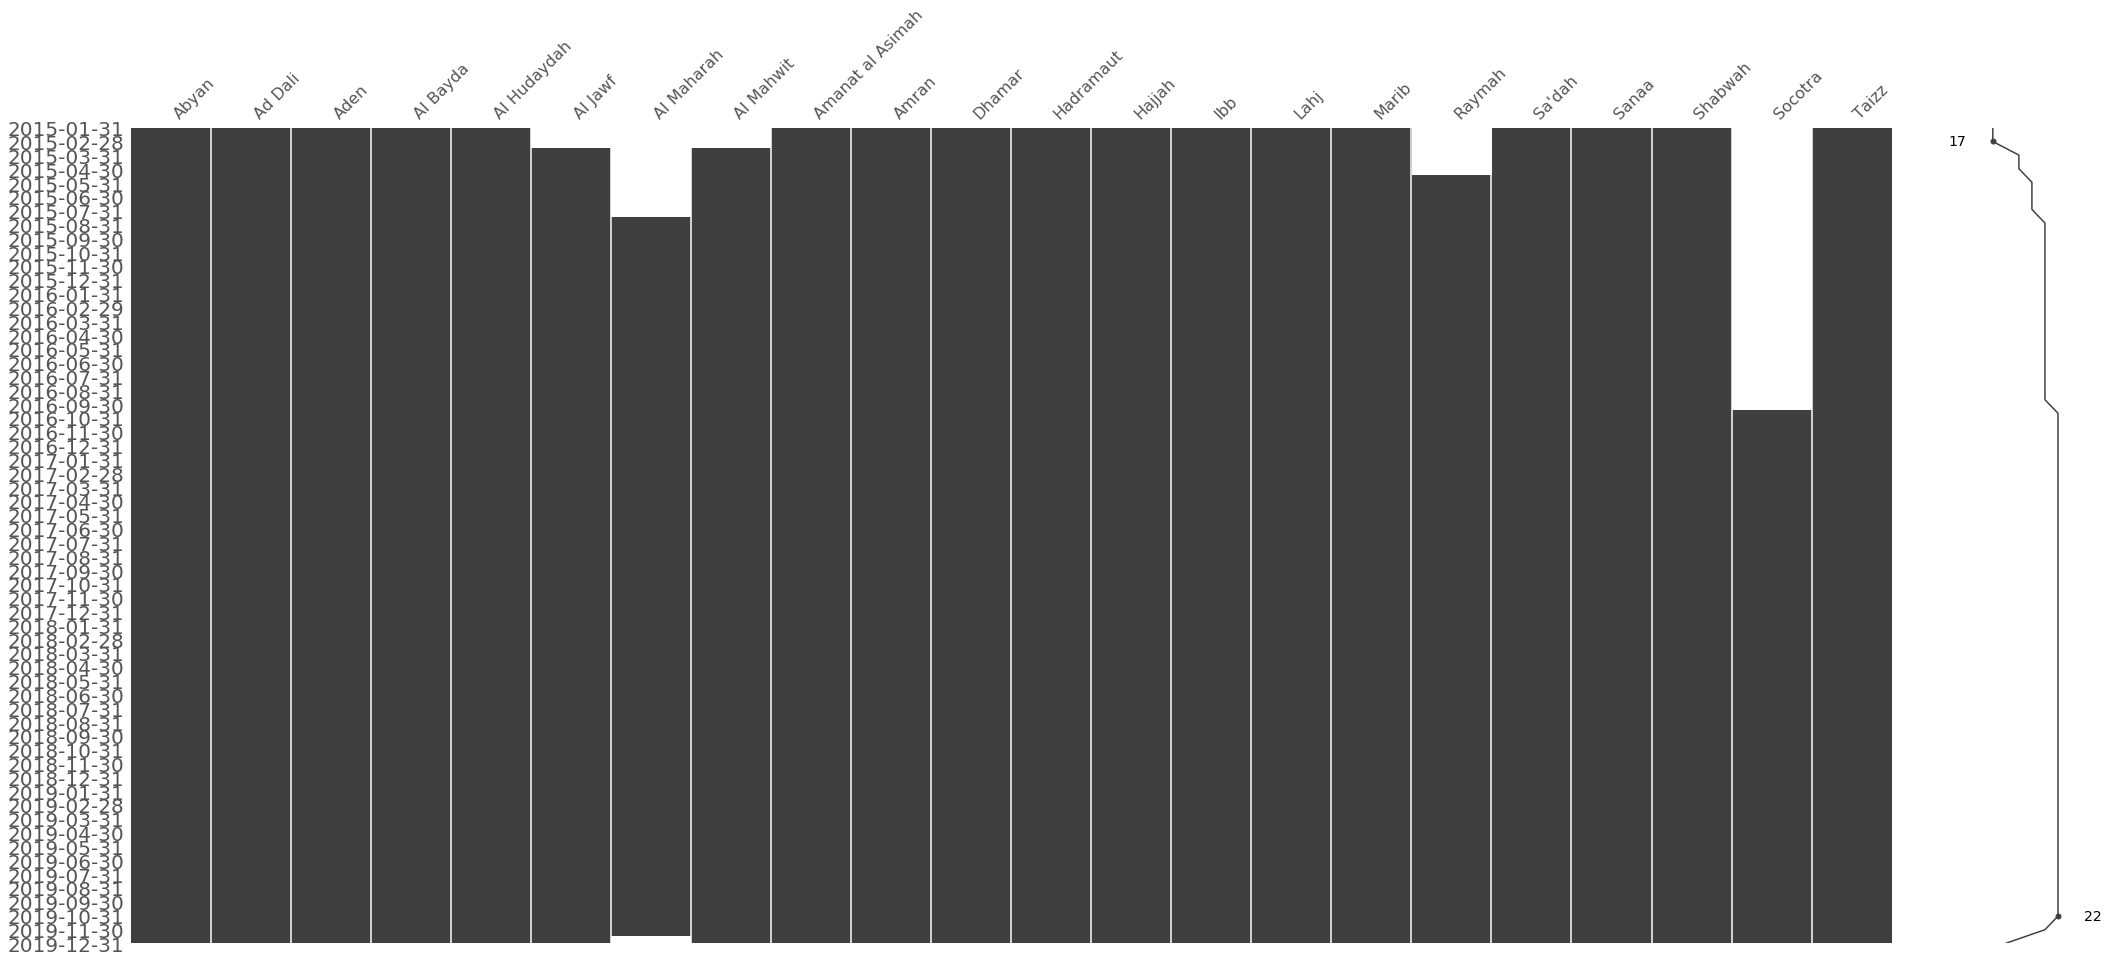

In [18]:
# Visualization of the missing values of the AdminStrata of the Yemen country.
miss = msno.matrix(df.set_index(pd.period_range(df.index[0], df.index[-1], freq = "M")), freq = "M", figsize = (35, 15))

### Get Conflicts time-series according to timestamp of FCS and rCSI time-series

In [19]:
# Food Consumption Score (FCS/FCG).
fcs = pd.read_excel("../Food Consumption Score (FCS)/wfp_fcs_yemen.xlsx", index_col = 0, parse_dates = True)
fcs.columns.name = "AdminStrata"

In [20]:
# Greater than the start date and smaller than the end date using as the first and the last index of the fcs and rcsi time-series.
mask = (df.index >= fcs.index[0]) & (df.index <= fcs.index[-1])
df = df.loc[mask]
df.head()

AdminStrata,Abyan,Ad Dali,Aden,Al Bayda,Al Hudaydah,Al Jawf,Al Maharah,Al Mahwit,Amanat al Asimah,Amran,...,Hajjah,Ibb,Lahj,Marib,Raymah,Sa'dah,Sanaa,Shabwah,Socotra,Taizz
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-09-30,0.0,0.0,32.0,87.0,42.0,16.0,0.0,2.0,244.0,29.0,...,76.0,62.0,13.0,359.0,0.0,97.0,37.0,101.0,NaN,271.0
2015-10-31,3.0,16.0,57.0,157.0,85.0,48.0,0.0,1.0,43.0,0.0,...,9.0,89.0,26.0,126.0,0.0,123.0,19.0,31.0,NaN,509.0
2015-11-30,0.0,159.0,7.0,76.0,28.0,67.0,0.0,2.0,18.0,1.0,...,9.0,39.0,146.0,165.0,0.0,37.0,1.0,80.0,NaN,717.0
2015-12-31,17.0,55.0,49.0,78.0,18.0,120.0,0.0,0.0,11.0,7.0,...,151.0,11.0,87.0,199.0,0.0,97.0,67.0,13.0,NaN,523.0
2016-01-31,6.0,17.0,80.0,65.0,15.0,163.0,0.0,0.0,132.0,5.0,...,60.0,28.0,50.0,271.0,0.0,69.0,19.0,16.0,NaN,298.0


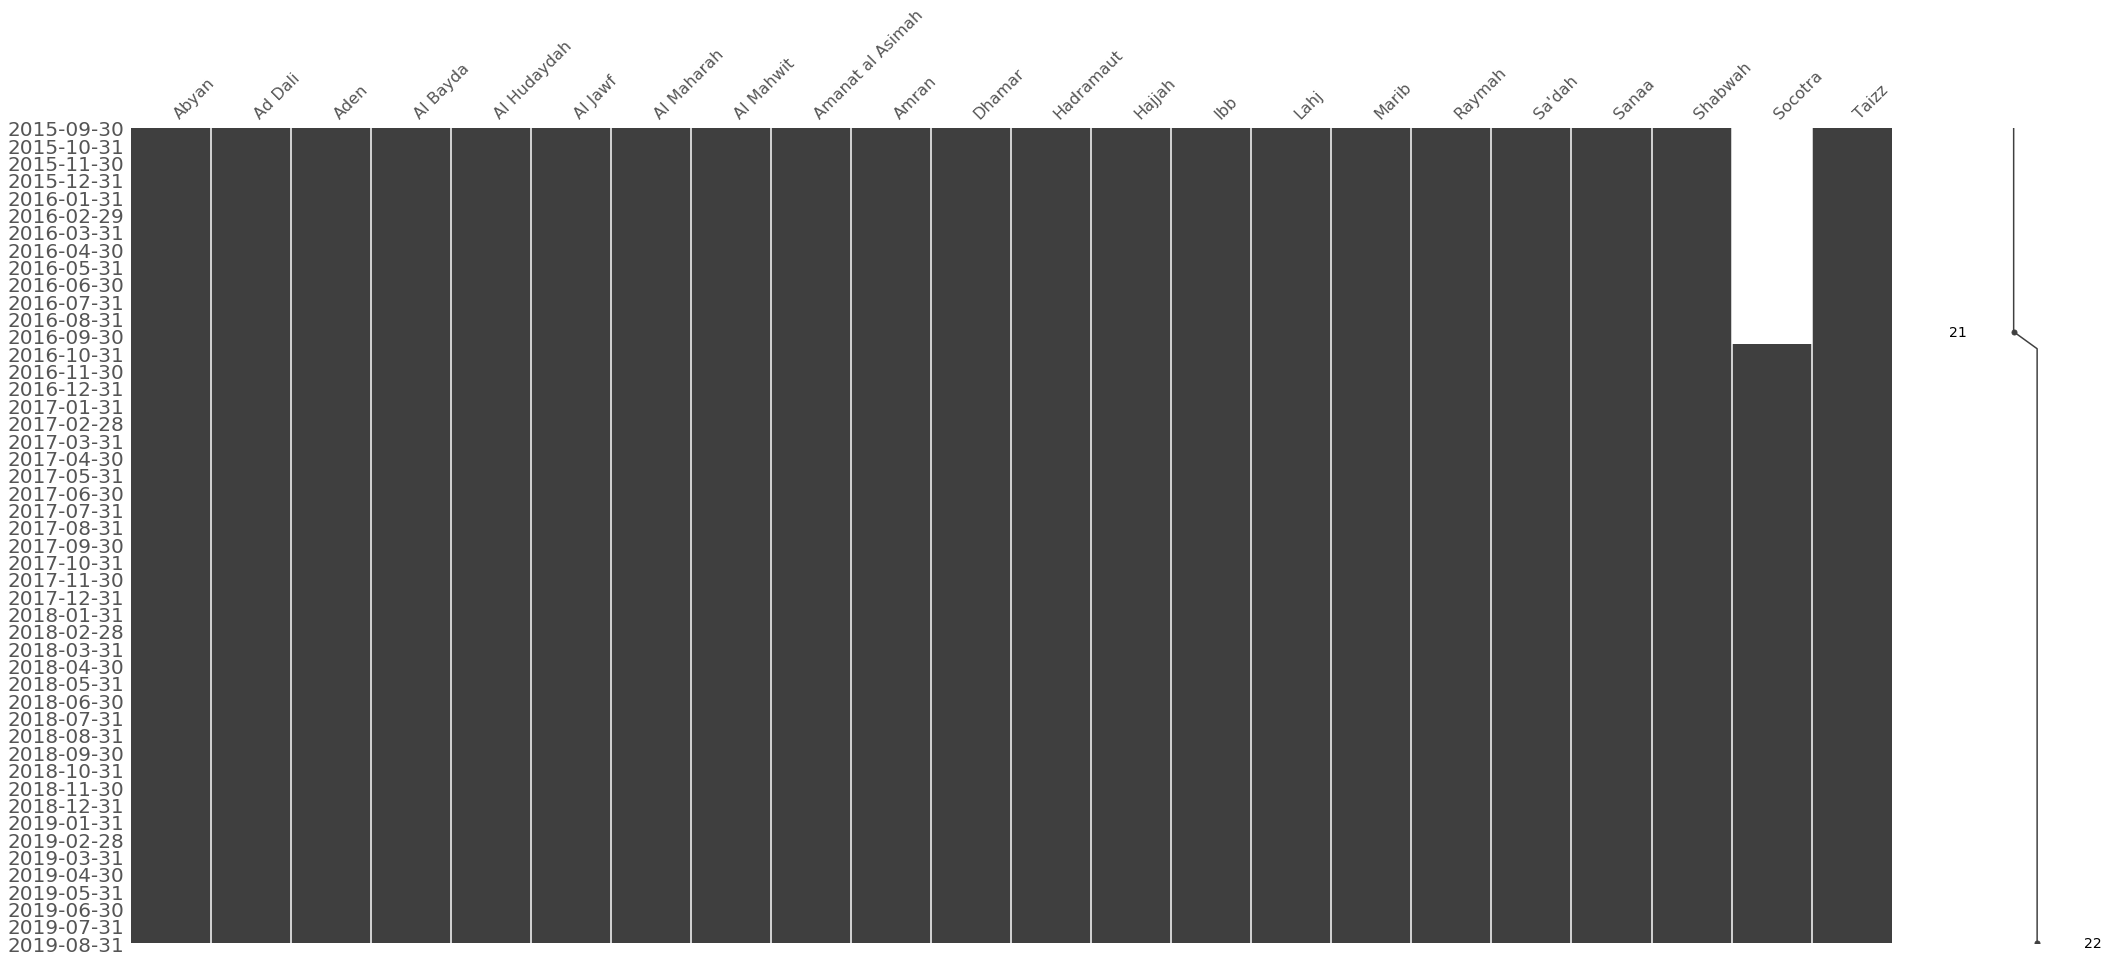

In [21]:
# Visualization of the missing values of the AdminStrata of the Yemen country.
miss = msno.matrix(df.set_index(pd.period_range(df.index[0], df.index[-1], freq = "M")), freq = "M", figsize = (35, 15))

In [22]:
# Delete the columns that contains Nan values in the temporal range of the FCS and rCSI time-series.
df.dropna(inplace = True, axis = 1)
df = df.add_prefix("Conflicts_")
df.head()

C:\Users\Pietro\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AdminStrata,Conflicts_Abyan,Conflicts_Ad Dali,Conflicts_Aden,Conflicts_Al Bayda,Conflicts_Al Hudaydah,Conflicts_Al Jawf,Conflicts_Al Maharah,Conflicts_Al Mahwit,Conflicts_Amanat al Asimah,Conflicts_Amran,...,Conflicts_Hadramaut,Conflicts_Hajjah,Conflicts_Ibb,Conflicts_Lahj,Conflicts_Marib,Conflicts_Raymah,Conflicts_Sa'dah,Conflicts_Sanaa,Conflicts_Shabwah,Conflicts_Taizz
Datetime,,,,,,,,,,,,,,,,,,,,,
2015-09-30,0.0,0.0,32.0,87.0,42.0,16.0,0.0,2.0,244.0,29.0,...,8.0,76.0,62.0,13.0,359.0,0.0,97.0,37.0,101.0,271.0
2015-10-31,3.0,16.0,57.0,157.0,85.0,48.0,0.0,1.0,43.0,0.0,...,25.0,9.0,89.0,26.0,126.0,0.0,123.0,19.0,31.0,509.0
2015-11-30,0.0,159.0,7.0,76.0,28.0,67.0,0.0,2.0,18.0,1.0,...,38.0,9.0,39.0,146.0,165.0,0.0,37.0,1.0,80.0,717.0
2015-12-31,17.0,55.0,49.0,78.0,18.0,120.0,0.0,0.0,11.0,7.0,...,5.0,151.0,11.0,87.0,199.0,0.0,97.0,67.0,13.0,523.0
2016-01-31,6.0,17.0,80.0,65.0,15.0,163.0,0.0,0.0,132.0,5.0,...,19.0,60.0,28.0,50.0,271.0,0.0,69.0,19.0,16.0,298.0


In [23]:
df.to_excel("wfp_conflicts_yemen.xlsx", index = True)